In [4]:
class Node:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None
        self.height = 1
        


In [5]:
# GET HEIGHT - HELPER FUNCTION

def get_height(rootnode):
    if not rootnode:
        return 0
    return rootnode.height

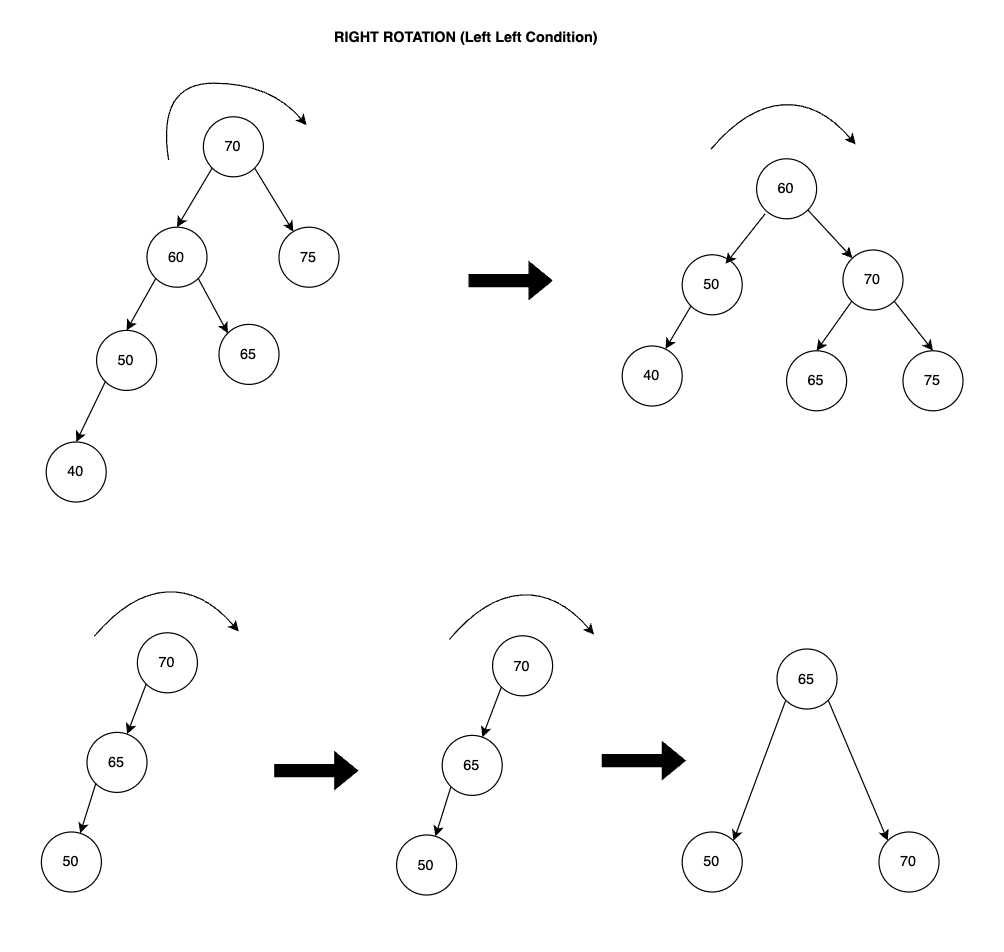

In [6]:
# RIGHT ROTATION - Algorithm of Left Left (LL) Condition

def right_rotate(unbalanced_node):
    new_root = unbalanced_node.left
    # below code, set to left.right in case there is a node attached, hence we cant set it to None
    unbalanced_node.left = unbalanced_node.left.right
    new_root.right = unbalanced_node
    #update height and newroot
    #return newroot 



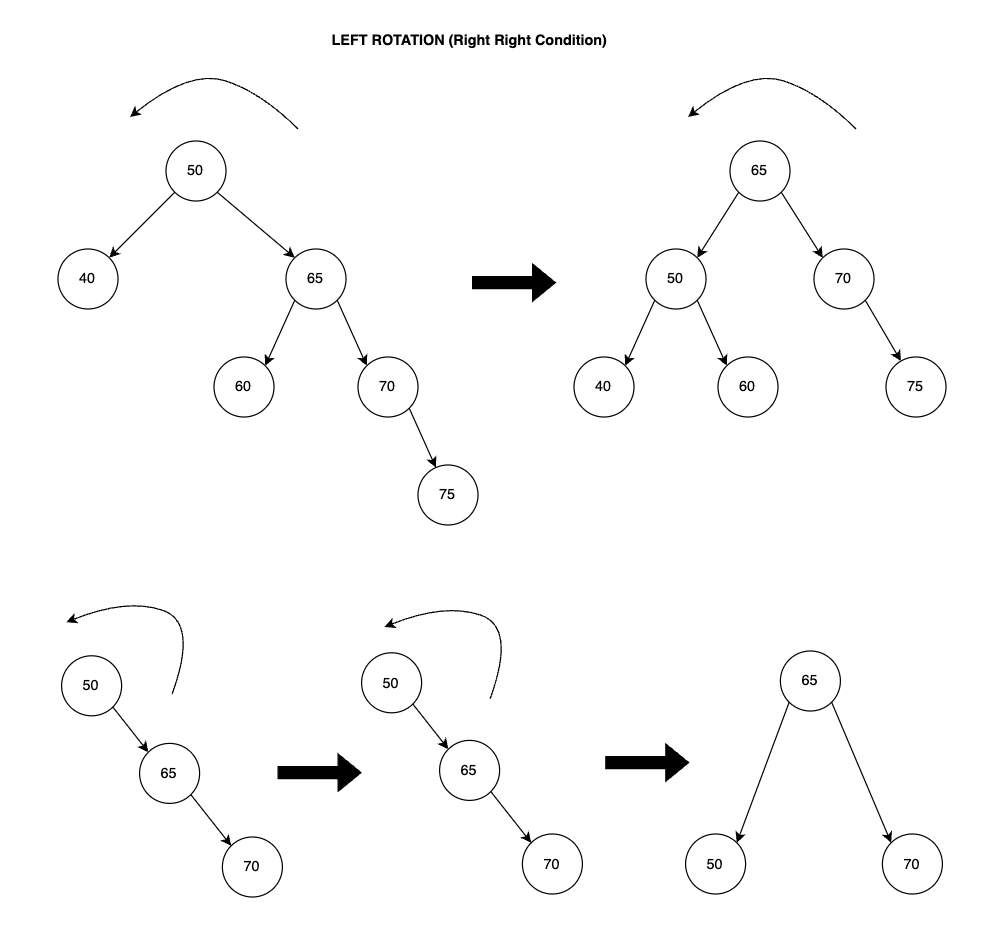

In [7]:
# LEFT ROTATION

def left_rotate(unbalance_node):
    new_root = unbalance_node.right
    unbalance_node.right = unbalance_node.right.left
    new_root.left = unbalance_node

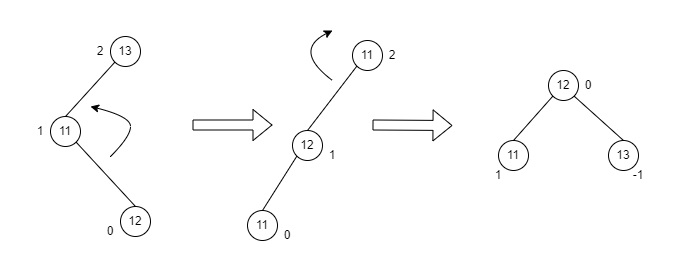

In [8]:
# LEFT RIGHT ROTATION



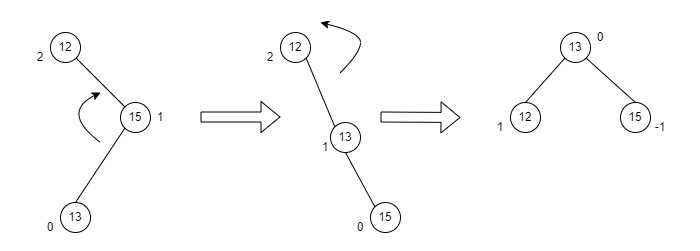

In [9]:
# RIGHT LEFT ROTATION

In [10]:
# INSERT A NODE - AVL 

# HELPER FUNCTIONS
def get_height(rootnode):
    if not rootnode:
        return 0
    return rootnode.height

def get_balance(rootnode):
    if not rootnode:
        return 0
    return get_height(rootnode.left) - get_height(rootnode.right)

def find_min_node(node):
    curr = node
    while curr.left:
        curr = curr.left
    return curr

# ROTATION FUNCTIONS 
def right_rotate(unbalanced_node):
    # rotation
    new_root = unbalanced_node.left
    unbalanced_node.left = unbalanced_node.left.right
    new_root.right = unbalanced_node
    # setting height for unbalanced_node
    # getting unbalanced_node left & right child height, still need the + '1' is for the parent unbalance_node.
    unbalanced_node.height = 1 + max(get_height(unbalanced_node.left), get_height(unbalanced_node.right))
    # setting height for new rootnode
    # getting the new rootnode left & right child height then, and add 1 for the new rootnode itself.
    new_root.height = 1 + max(get_height(new_root.left), get_height(new_root.right))
    return new_root

def left_rotate(unbalanced_node):
    # rotation
    new_root = unbalanced_node.right
    unbalanced_node.right = unbalanced_node.right.left
    new_root.left = unbalanced_node
    # setting height for unbalanced_node
    # getting unbalanced_node left & right child height, still need the + '1' is for the parent unbalance_node.
    unbalanced_node.height = 1 + max(get_height(unbalanced_node.left), get_height(unbalanced_node.right))
    # setting height for new rootnode
    # getting the new rootnode left & right child height then, and add 1 for the new rootnode itself.
    new_root.height = 1 + max(get_height(new_root.left), get_height(new_root.right))
    return new_root

def insert_node(rootnode, value):
    if not rootnode:
        return Node(value)
    elif rootnode.data < value:
        rootnode.right = insert_node(rootnode.right, value)
    else:
        rootnode.left = insert_node(rootnode.left, value)

    # after node has been inserted, check for AVL conditions here
    rootnode.height = 1 + max(get_height(rootnode.left), get_height(rootnode.right))
    balance = get_balance(rootnode)
    # if left child head value is greater than right child head value
    
    # right rotation - left left condition
    if balance > 1 and value < rootnode.left.data:
        return right_rotate(rootnode)
    # left right rotation - left right condition
    if balance > 1 and value > rootnode.left.data:
        rootnode.left = left_rotate(rootnode.left)
        return right_rotate(rootnode)
    # left rotation - right right condition
    # reason why -1 is because get_balance(rootnode) function
    # if right subtree is too tall, get_balance function will give -1
    # since return get_height(rootnode.left) - get_height(rootnode.right)
    if balance < -1 and value > rootnode.right.data:
        return left_rotate(rootnode)
    # right left rotation - right left condition
    if balance < -1 and value < rootnode.right.data:
        rootnode.right = right_rotate(rootnode.right)
        return left_rotate(rootnode)
    return rootnode

def delete_node(rootnode, value):
    if not rootnode:
        return
    if rootnode.data < value:
        rootnode.right = delete_node(rootnode.right, value)
    elif rootnode.data > value:
        rootnode.left = delete_node(rootnode.left, value)
    else:
        ''' When the rootnode.data == value, rootnode to be deleted node '''
        # check case 1 & case 2, when rootnode has no child or only 1 child
        if rootnode.left is None:
            temp = rootnode.right
            rootnode = None
            return temp
        if rootnode.right is None:
            temp = rootnode.left
            rootnode = None
            return temp
        # case 3, when rootnode to be deleted has 2 children
        min_node = find_min_node(rootnode.right)
        rootnode.data = min_node.data
        rootnode.right = delete_node(rootnode.right, min_node.data)
        
    # if the tree has only one node
    if rootnode is None:
        return rootnode
    
    # update height
    rootnode.height = 1 + max(get_height(rootnode.left), get_height(rootnode.right))
    
    # check balance
    balance = get_balance(rootnode)
    
    # rotation if needed
    ''' RIGHT ROTATION - LEFT LEFT CONDITION ''' 
    if balance > 1 and value < rootnode.left:
        return right_rotate(rootnode)
    ''' LEFT RIGHT ROTATION - LEFT RIGHT CONDITION '''
    ''' LEFT ROTATION - RIGHT RIGHT CONDITION '''
    ''' RIGHT LEFT ROTATION - RIGHT LEFT CONDITION '''
    
    # return rootnode
    


In [15]:
def level_order_traversal(rootnode):
    if not rootnode:
        return
    queue = []
    queue.append(rootnode)
    while len(queue) > 0:
        print(queue[0].data)
        node = queue.pop(0)
        if node.left:
            queue.append(node.left)
        if node.right:
            queue.append(node.right)

# Create an AVL tree and insert nodes
newAVL = Node(5)
newAVL = insert_node(newAVL, 10)
newAVL = insert_node(newAVL, 15)
newAVL = insert_node(newAVL, 20)
newAVL = insert_node(newAVL, 7)
newAVL = insert_node(newAVL, 6)
newAVL = insert_node(newAVL, 25)
newAVL = insert_node(newAVL, 30)



# Perform level order traversal
level_order_traversal(newAVL)



10
6
20
5
7
15
25
30
